In [34]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
data = pd.read_csv("reddit_worldnews_sentiments_clean.csv")
data.head()

,Title,Num_Comments,Upvotes,Downvotes,Upvote_Ratio,Date_Posted,Flair,Post_Category,Top_Comment_Score,Sentiment_Label
0,An anti-gay Hungarian politician has resigned ...,849,204547,0,0.93,01/12/20 18:15,NaN,Top,7555.0,negative
1,Trump Impeached for Abuse of Power,879,202909,0,0.88,19/12/19 1:23,Trump,Top,5150.0,negative
2,Vladimir Putin's black belt revoked by interna...,798,200149,0,0.89,28/02/22 20:45,NaN,Top,2907.0,neutral
3,"Two weeks before his inauguration, Donald J. T...",914,189352,0,0.84,19/07/18 2:06,NaN,Top,249.0,positive
4,"Queen Elizabeth II has died, Buckingham Palace...",905,189025,0,0.79,08/09/22 17:32,NaN,Top,1.0,negative


In [36]:
title = data["Title"]
title.head()

0    An anti-gay Hungarian politician has resigned ...
1                   Trump Impeached for Abuse of Power
2    Vladimir Putin's black belt revoked by interna...
3    Two weeks before his inauguration, Donald J. T...
4    Queen Elizabeth II has died, Buckingham Palace...
Name: Title, dtype: object

In [37]:
title = title.str.lower().replace('[^\w\s]', '', regex=True)

In [38]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [39]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(title)

sequences = tokenizer.texts_to_sequences(title)

vocab_size = len(tokenizer.word_index) + 1

maxlen = max(len(seq) for seq in sequences)
term_doc_matrix = pad_sequences(sequences, padding='post', maxlen=maxlen)

tdm_df = pd.DataFrame(term_doc_matrix)

reverse_word_index = dict([(value, key) for (key, value) in tokenizer.word_index.items()])

tdm_df = tdm_df.replace(reverse_word_index)

tdm_df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,an,antigay,hungarian,politician,has,resigned,after,being,caught,by,police,fleeing,a,25man,orgy,through,a,window,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,trump,impeached,for,abuse,of,power,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,vladimir,putins,black,belt,revoked,by,international,taekwondo,organization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,two,weeks,before,his,inauguration,donald,j,trump,was,shown,highly,classified,intelligence,indicating,that,president,vladimir,v,putin,of,russia,had,personally,ordered,complex,cyberattacks,to,sway,the,2016,american,election,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,queen,elizabeth,ii,has,died,buckingham,palace,announces,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,more,than,150,senior,russian,officials,sign,open,letter,condemning,putins,invasion,of,ukraine,as,an,unprecedented,atrocity,and,warn,of,catastrophic,consequences,while,urging,citizens,not,to,participate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,rejecting,us,evacuation,offer,zelensky,says,i,need,antitank,ammo,not,a,ride,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,anonymous,leaks,database,of,the,russian,ministry,of,defence,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,26,terabyte,leak,of,panamanian,shell,company,data,reveals,how,a,global,industry,led,by,major,banks,legal,firms,and,asset,management,companies,secretly,manages,the,estates,of,politicians,fifa,officials,fraudsters,and,drug,smugglers,celebrities,and,professional,athletes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,kyiv,full,consensus,for,disconnecting,russia,from,swift,has,been,achieved,the,process,has,begun,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
tdm_df.to_csv("Term Document Index.csv", index=False)

In [41]:
import numpy as np

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

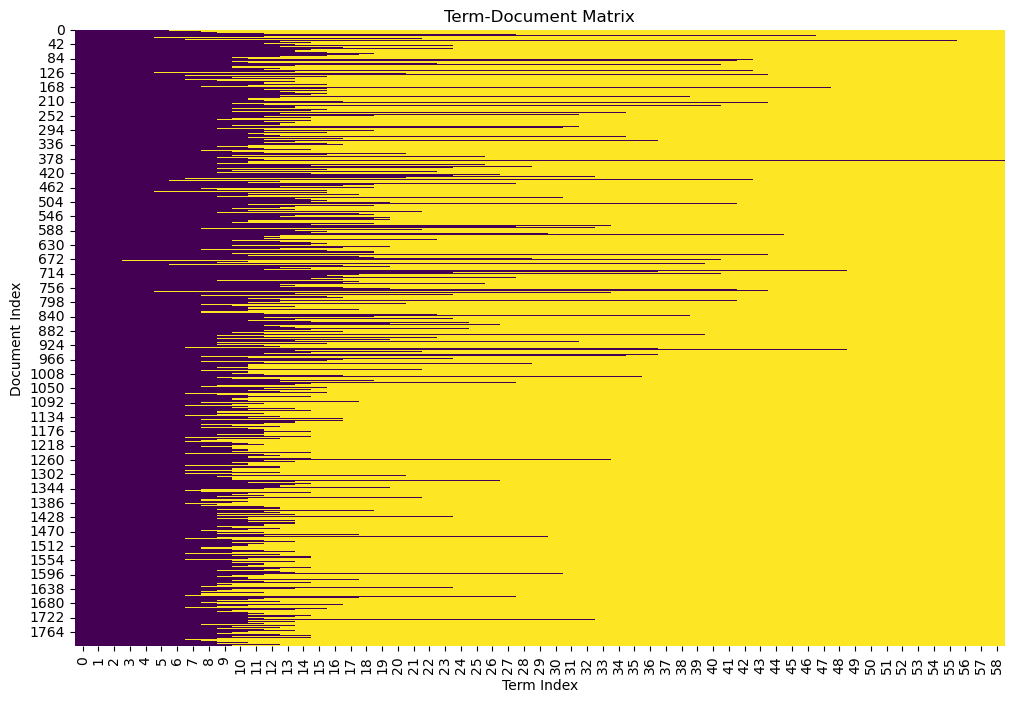

In [46]:
tdm_array = np.array(tdm_df)

plt.figure(figsize=(12, 8))
sns.heatmap(tdm_array==0, cmap='viridis', cbar=False)
plt.xlabel('Term Index')
plt.ylabel('Document Index')
plt.title('Term-Document Matrix')
plt.show()

In [44]:
tdm_array

array([['an', 'antigay', 'hungarian', ..., 0, 0, 0],
       ['trump', 'impeached', 'for', ..., 0, 0, 0],
       ['vladimir', 'putins', 'black', ..., 0, 0, 0],
       ...,
       ['lahore', 'underworld', 'don', ..., 0, 0, 0],
       ['overwhelmed', 'by', 'war', ..., 0, 0, 0],
       ['thousands', 'protest', 'mexican', ..., 0, 0, 0]], dtype=object)

# Notes:
1. tdm_df consists of a term document matrix, the full matrix is present in the csv file called "Term Document Matrix.csv"
2. The heatmap consists of terms for the term document matrix